# **k-nearest neighbors algorithm**

In pattern recognition, the k-nearest neighbors algorithm is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.


uploading data set locally

In [3]:
from google.colab import files
uploaded = files.upload()

Saving credit_data.csv to credit_data.csv


## **Importing libraries**

We will import NumPy as np, Pandas as *pd*, train_test_split & cross_val_score from sklearn.model_selection, confusion_matrix & accuracy_score from sklearn.metrics, KNeighborsClassifier from sklearn.neighbors and preprocessing  from sklearn.

In [37]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## **DataFraming**

Read .csv data into a Dataframe 

In [9]:
data = pd.read_csv(io.BytesIO(uploaded['credit_data.csv']))
print(data.head(20))

    clientid        income        age         loan       LTI  default
0          1  66155.925095  59.017015  8106.532131  0.122537        0
1          2  34415.153966  48.117153  6564.745018  0.190752        0
2          3  57317.170063  63.108049  8020.953296  0.139940        0
3          4  42709.534201  45.751972  6103.642260  0.142911        0
4          5  66952.688845  18.584336  8770.099235  0.130989        1
5          6  24904.064140  57.471607    15.498598  0.000622        0
6          7  48430.359613  26.809132  5722.581981  0.118161        0
7          8  24500.141984  32.897548  2971.003310  0.121265        1
8          9  40654.892537  55.496853  4755.825280  0.116980        0
9         10  25075.872771  39.776378  1409.230371  0.056199        0
10        11  64131.415372  25.679575  4351.028971  0.067846        0
11        12  59436.847123  60.471936  9254.244538  0.155699        0
12        13  61050.346079  26.355044  5893.264659  0.096531        0
13        14  27267.

In [12]:
print(data.isna().sum(axis = 0))
print("number of defaulters: ",data.default.sum())

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64
number of defaulters:  283


## **Features Extraction**

Extracting features and splitting data into test and train.

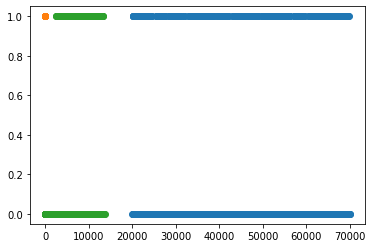

In [27]:
features = data[["income","age","loan"]]
target = data.default

plt.scatter(data.income , target)
plt.scatter(data.age , target)
plt.scatter(data.loan , target)
plt.show()

In [25]:
target.head()

0    0
1    0
2    0
3    0
4    1
Name: default, dtype: int64

# **Preprocessing: standard scaling**

In [36]:
features = preprocessing.MinMaxScaler().fit_transform(features)
feature_train, feature_test, target_train, target_test = train_test_split(features, target)
print(feature_train.size)
print(feature_test.size)
print(target_train.size)
print(target_test.size)

4500
1500
1500
500


## **Training the Model**

We are using KNeighborsClassifier model as imported from sklearn.neighbors library and then it's being trained on feature_train and target_train

In [ ]:
model = KNeighborsClassifier(n_neighbors=32)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

## **Finding Optimal K Value**

We are going to use cross-validation in order to find the optimal k value. This optimal value is not going to have as good accuracy and precision as we have seen for any neighbors close to ***n*** but it is going to be much more realistic because we use cross-validation. So we are going to use the cross-validation scores and then we are going to make a simple iteration. Basically we are going to consider k values from 1 up to 100.


In [ ]:
cross_valid_scores = []

for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn,data.features, data.target, cv = 10, scoring = 'accuracy')
  cross_valid_scores.append(scores.mean())

print("Optimal k with cross-validation: \t",np.argmax(cross_valid_scores))

Optimal k with cross-validation: 	 32


## **Printing an Error Matrix and Accuracy Score**

In [ ]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[437   2]
 [ 10  51]]
0.976
